In [1]:
%matplotlib inline

In [2]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [15]:
def preData(N):
    # N: Ranking the top N
    user_abspath = os.path.abspath("../data/user.csv")
    df = pd.read_csv(user_abspath)
    df['votes'] = df['votes'].apply(lambda x: json.loads(x.replace("'","\"")))
    for ele in ['funny','cool','useful']:
        df[ele] = df['votes'].apply(lambda x: x[ele])
    df['total_votes'] = df['votes'].apply(lambda x: x['funny'] + x['cool'] +x['useful'])
    df_result=df.sort_values(by='total_votes',ascending=False)[['name','funny','cool','useful']][:N].reset_index().drop('index',1)
    return df_result

def autolabel(ax,rects, h=1.03,w=0):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2-w, h*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize='small')

def plot_result(N=15):
    # prepare dataframe df_result
    df_result = preData(N)
    X=df_result['name'].values
    Y_funny=df_result['funny'].values
    Y_cool=df_result['cool'].values
    Y_useful=df_result['useful'].values

    x= np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars

    fig = plt.figure(figsize=(25,10))
    ax = plt.subplot(111)

    rects1 = ax.bar(x, Y_funny, width, color='r',alpha=0.6)
    rects2 = ax.bar(x + width, Y_cool, width, color='y',alpha=0.6)
    rects3 = ax.bar(x + width + width, Y_useful, width, color='g',alpha=0.6)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Vote Count')
    ax.set_title('Funny-Cool-Uselful Votes',x =0.5, y =0.9,fontsize='large')
    ax.set_xticks(x + width)
    ax.set_xticklabels(X,rotation=35,fontsize=12)
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax.legend((rects1[0], rects2[0], rects3[0]), ('funny', 'cool', 'useful'))

    autolabel(ax,rects1,h=0.97,w=0.1)
    autolabel(ax,rects2,h=0.99)
    autolabel(ax,rects3)
    ax.margins(x=0.02)
    plt.show()

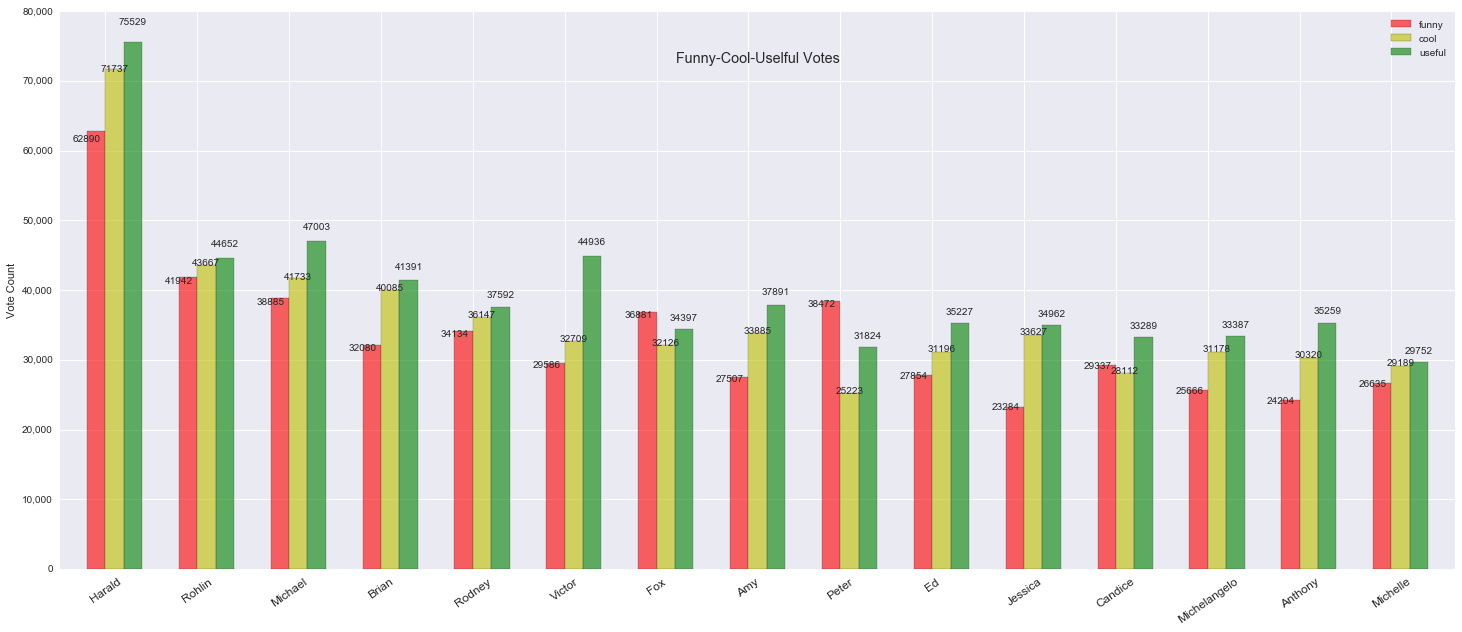

In [16]:
plot_result()